In [1]:
# Goal: extract cell growth rates from segmentation mask of ablated cell and its neighbors
# Ablated cell and neighbor are tracked manually

In [275]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

In [276]:
dirname = '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/'

In [277]:
# to initiate a list
imseries = []
# Loop through the timeframes
for i in range(4):
    # Construct the actual filename to load
    filename = dirname + 't'+ str(i) +'_cp_masks.tif'
    print(filename)
    # Load the image into a matrix
    im = io.imread(filename)
    # Append the new image into the list of images
    imseries.append(im)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/t0_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/t1_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/t2_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/t3_cp_masks.tif


/Users/aliyafisher/anaconda3/envs/python39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


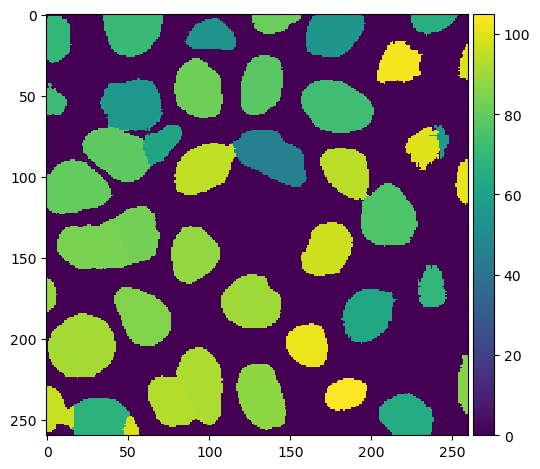

In [278]:
im = imseries[1]
io.imshow(im[49,...])

In [280]:
def pixelcount (Image, label):
    A=Image==label
    return np.sum (A)

In [297]:
excelname= dirname + 'ablation timepoints.xlsx'
annotations = pd.read_excel(excelname,index_col=0,sheet_name='R1')


,t0,t1,t2,t3,Notes
Cell names,,,,,
a,61,90.0,139.0,127.0,bottom
b,90,97.0,145.0,153.0,counterclockwise
c,86,94.0,143.0,172.0,NaN
d,64,73.0,138.0,171.0,NaN
e,73,78.0,137.0,149.0,NaN
f,83,95.0,90.0,152.0,NaN
g,87,88.0,130.0,157.0,NaN
dead cell,93,NaN,NaN,NaN,NaN


In [285]:
cellvolumes = np.zeros((4,7))
for i,cellname in enumerate(colnames):
    for j,time in enumerate(['t0','t1','t2','t3']):
        cellvolumes[j,i]= pixelcount(imseries[j] , annotations.loc[cellname, time])
cellvolumes

array([[11766., 13043., 10751., 13050.,  8872., 11544.,  9718.],
       [ 9828., 10691.,  9632., 12150.,  8516., 10470.,  8321.],
       [ 8550., 10292.,  8865., 11510.,  8162.,  7905.,  7026.],
       [18703.,  5938.,  6788.,  7684., 10009., 14169., 11570.]])

In [287]:
cellvolumes[:,0]

array([11766.,  9828.,  8550., 18703.])

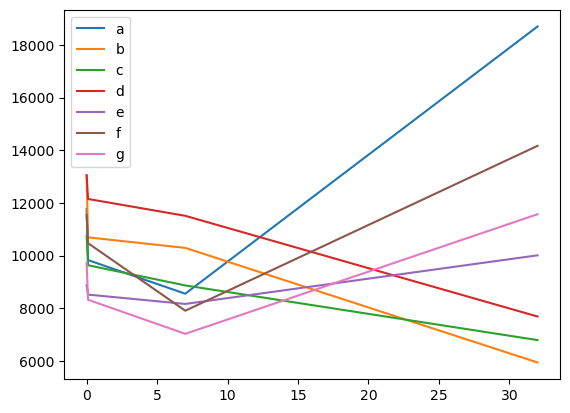

In [293]:
timestamps = [0, 0.1, 7, 32]
plt.plot(timestamps,cellvolumes); plt.legend(colnames)